In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import feature_column as fc 
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

#    0. CRIM      per capita crime rate by town
#    1. ZN        proportion of residential land zoned for lots over 
#                 25,000 sq.ft.
#    2. INDUS     proportion of non-retail business acres per town
#    3. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                 river; 0 otherwise)
#    4. NOX       nitric oxides concentration (parts per 10 million)
#    5. RM        average number of rooms per dwelling
#    6. AGE       proportion of owner-occupied units built prior to 1940
#    7. DIS       weighted distances to five Boston employment centres
#    8. RAD       index of accessibility to radial highways
#    9. TAX      full-value property-tax rate per $10,000
#    10. PTRATIO  pupil-teacher ratio by town
#    11. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                 by town
#    12. LSTAT    % lower status of the population
#    13. MEDV     Median value of owner-occupied homes in $1000's

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

tf.keras.backend.set_floatx('float64')
tf.__version__
#tf.estimator.Estimator._validate_features_in_predict_input = lambda *args: None

features = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE',
            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
 
x_train_df = pd.DataFrame(x_train, columns= features)
x_test_df = pd.DataFrame(x_test, columns= features)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
x_train_df.head()

feature_columns = []
for feature_name in features:
    feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

#print(feature_columns)
    
def estimator_input_fn(df_data, df_label, epochs=20, shuffle=True, batch_size=64):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function

train_input_fn = estimator_input_fn(x_train_df, y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test_df, epochs=1, shuffle=False)


linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir = 'logs/func/')
linear_est.train(train_input_fn, steps=1000)
result = linear_est.evaluate(val_input_fn)
print(result)

result = linear_est.evaluate(val_input_fn)

print(result)

result = linear_est.predict(val_input_fn)

for pred, exp in zip(result, y_test[:32]):
    print("Predicted Value: ", pred['predictions'][0], "Expected:", exp)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/func/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.re

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/func/model.ckpt-420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/func/model.ckpt-420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


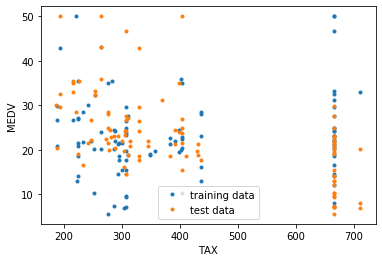

In [21]:

pred_traning = linear_est.predict(train_input_fn)

DISPLAY_INDEX = 9

PREDICTED_INDEPENDANT = []
PREDICTED_DEPENDANT = []
TRAINING_INDEPENDANT = []
TRAINING_DEPENDANT = []
VAL_INDEPENDANT = []
VAL_DEPENDANT = []

count = 0

for pred, exp in zip(pred_traning, y_test):
    PREDICTED_INDEPENDANT.append(x_train[count][DISPLAY_INDEX])
    PREDICTED_DEPENDANT.append(pred['predictions'][0])
    TRAINING_INDEPENDANT.append(x_train[count][DISPLAY_INDEX])
    TRAINING_DEPENDANT.append(exp)
    count += 1

pred_validation = linear_est.predict(val_input_fn)

count = 0
for pred, exp in zip(pred_validation, y_test):
    PREDICTED_INDEPENDANT.append(x_test[count][DISPLAY_INDEX])
    PREDICTED_DEPENDANT.append(pred['predictions'][0])
    VAL_INDEPENDANT.append(x_test[count][DISPLAY_INDEX])
    VAL_DEPENDANT.append(exp)
    count += 1

    
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(TRAINING_INDEPENDANT, TRAINING_DEPENDANT, label='training data', linewidth=0, marker='.')
ax.plot(VAL_INDEPENDANT, VAL_DEPENDANT, label='test data', linewidth=0, marker='.')
#ax.plot(PREDICTED_INDEPENDANT, PREDICTED_DEPENDANT, label='prediction values', linewidth=0, marker='.')
ax.set_xlabel(features[DISPLAY_INDEX])  # Add an x-label to the axes.
ax.set_ylabel('MEDV')  # Add a y-label to the axes.
ax.legend() 


In [4]:

for i in features:
    print(i, linear_est.get_variable_value('linear/linear_model/' + i + '/weights'))


CRIM [[-0.1278067]]
ZN [[0.11094753]]
INDUS [[-0.074232]]
CHAS [[2.484133]]
NOX [[0.1841021]]
RM [[0.4910459]]
AGE [[0.08967081]]
DIS [[0.06392721]]
RAD [[0.04075746]]
TAX [[0.00525905]]
PTRATIO [[0.11728902]]
B [[0.03998056]]
LSTAT [[-0.49177423]]
